### Web map visualisation

This project visualizes the locations of more than 7,000 restaurants in Houston, TX

In [1]:
# Install and import folium

!pip install folium
import folium

In [2]:
# A simple visualization of the most remote island (Bouvet Island - Norwey) on earth.

test_coor = [-54.419992, 3.356570]
test_map = folium.Map(location=test_coor, zoom_start=10) # start at zoom level 10
test_map

In [3]:
# Adding a marker saving the map as an html file

test_coor = [-54.419992, 3.356570]
test_map = folium.Map(location=test_coor, zoom_start=12,tiles="Stamen Terrain")
folium.Marker([-54.419992, 3.356570], popup = "Bouvet Island, Norwey").add_to(test_map)
test_map.save("test_map.html")
test_map

In [4]:
# Import the restaurants file

import pandas as pd
df = pd.read_csv(r"restaurants.csv")
df.head(2)

,alias,display_phone,distance,id,image_url,is_closed,name,phone,price,rating,...,longitude,address1,address2,address3,city,country,display_address,state,zip_code,Restaurant Category
0,bird-haus-houston,NaN,1353.224697,y8zMac68WqA37d4IVYCtdw,https://s3-media4.fl.yelpcdn.com/bphoto/XcbSFu...,False,Bird Haus,NaN,$$,4.5,...,-95.361582,1010 Prairie St,NaN,NaN,Houston,US,"['1010 Prairie St', 'Houston, TX 77002']",TX,77002.0,Sandwiches
1,guss-world-famous-fried-chicken-houston-2,(832) 740-4022,679.718934,eO55csoh_thLYu8boiP6iQ,https://s3-media1.fl.yelpcdn.com/bphoto/MNgTNT...,False,Gus's World Famous Fried Chicken,1.832740e+10,$,4.0,...,-95.376550,1815 Washington Ave,NaN,NaN,Houston,US,"['1815 Washington Ave', 'Houston, TX 77007']",TX,77007.0,Southern


In [5]:
df.describe

<bound method NDFrame.describe of                                           alias   display_phone     distance  \
0                             bird-haus-houston             NaN  1353.224697   
1     guss-world-famous-fried-chicken-houston-2  (832) 740-4022   679.718934   
2                   stantons-city-bites-houston  (713) 227-4893   216.564140   
3                                ritual-houston  (832) 203-5180  2130.045112   
4               hearsay-market-square-houston-2  (713) 225-8079  1131.037009   
...                                         ...             ...          ...   
7125                    corner-bakery-houston-2             NaN    64.035310   
7126                    murphys-deli-houston-85  (281) 494-1960  5029.136014   
7127              midtown-cafe-and-deli-houston  (713) 864-3535  1631.814204   
7128                    luna-restaurant-houston  (281) 333-9300  3797.458644   
7129                 jack-in-the-box-houston-59  (281) 955-0830   758.866814   

     

In [6]:
df.columns

Index(['alias', 'display_phone', 'distance', 'id', 'image_url', 'is_closed',
       'name', 'phone', 'price', 'rating', 'review_count', 'transactions',
       'url', 'latitude', 'longitude', 'address1', 'address2', 'address3',
       'city', 'country', 'display_address', 'state', 'zip_code',
       'Restaurant Category'],
      dtype='object')

In [7]:
# Check for missing values
df.isnull().any()

alias                  False
display_phone           True
distance               False
id                     False
image_url               True
is_closed              False
name                   False
phone                   True
price                   True
rating                 False
review_count           False
transactions           False
url                    False
latitude                True
longitude               True
address1                True
address2                True
address3                True
city                   False
country                False
display_address        False
state                  False
zip_code                True
Restaurant Category    False
dtype: bool

In [8]:
# Check for the sums of the missing values

df.isnull().sum()

alias                     0
display_phone           391
distance                  0
id                        0
image_url               284
is_closed                 0
name                      0
phone                   391
price                  1518
rating                    0
review_count              0
transactions              0
url                       0
latitude                  4
longitude                 4
address1                102
address2               5372
address3               6961
city                      0
country                   0
display_address           0
state                     0
zip_code                 10
Restaurant Category       0
dtype: int64

In [9]:
# Number of restaurants by category

df["Restaurant Category"].value_counts()

Mexican            885
Fast Food          516
Pizza              402
Sandwiches         378
Burgers            362
                  ... 
Irish Pub            1
Performing Arts      1
Unknown              1
Fondue               1
Golf                 1
Name: Restaurant Category, Length: 177, dtype: int64

<AxesSubplot:>

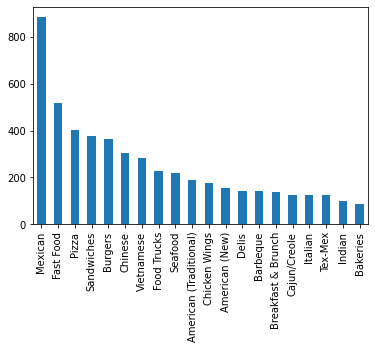

In [10]:
# Plot the restaurant category data

import matplotlib.pyplot as plt
df["Restaurant Category"].value_counts()[:20].plot(kind = "bar")

<AxesSubplot:>

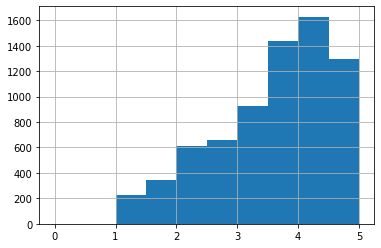

In [11]:
# Distribution of the ratings on a histogram

df["rating"].hist()

In [12]:
df.head(1)

,alias,display_phone,distance,id,image_url,is_closed,name,phone,price,rating,...,longitude,address1,address2,address3,city,country,display_address,state,zip_code,Restaurant Category
0,bird-haus-houston,NaN,1353.224697,y8zMac68WqA37d4IVYCtdw,https://s3-media4.fl.yelpcdn.com/bphoto/XcbSFu...,False,Bird Haus,NaN,$$,4.5,...,-95.361582,1010 Prairie St,NaN,NaN,Houston,US,"['1010 Prairie St', 'Houston, TX 77002']",TX,77002.0,Sandwiches


In [13]:
# Filter the columns that will be used in the visualization

rest = df[["rating","latitude","longitude","name","address1"]] # double brackets make a new data frame. if needed use pd.DataFrame(rest)
rest.head()

,rating,latitude,longitude,name,address1
0,4.5,29.760360,-95.361582,Bird Haus,1010 Prairie St
1,4.0,29.767530,-95.376550,Gus's World Famous Fried Chicken,1815 Washington Ave
2,4.5,29.770945,-95.372068,Stanton's City Bites,1420 Edwards St
3,4.0,29.781930,-95.387350,Ritual,602 Studewood St
4,4.0,29.763046,-95.361572,Hearsay Market Square,218 Travis St


In [14]:
# Check for missing values in the filtered data frame

rest.isnull().sum()

rating         0
latitude       4
longitude      4
name           0
address1     102
dtype: int64

In [15]:
# Check for any duplicates

rest.duplicated().sum()

0

In [16]:
rest.shape

(7130, 5)

In [17]:
# Drop the rows with missing coordinates

rest.dropna(subset = ["latitude", "longitude"], axis=0, inplace=True) # axis=0 deletes the row, axis=1 deletes the column
rest.shape

d:\mambaforge\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(7126, 5)

In [18]:
rest.isnull().sum()
# rest.isnull().any()

rating        0
latitude      0
longitude     0
name          0
address1     98
dtype: int64

In [19]:
rest.head(1)

,rating,latitude,longitude,name,address1
0,4.5,29.76036,-95.361582,Bird Haus,1010 Prairie St


In [20]:
# CREATE THE MAP. THIS PROCESS TAKES 1-2 MINUTES TO COMPLETE
# REPLACE range(100) WITH Range(len(rest["rating"])) TO SEE THE ENTIRE DATA

coor=[29.76087, -95.35462]
my_map = folium.Map(location=coor, zoom_start=11)                  

for i in range(100):
    folium.Marker([rest.iloc[i]["latitude"],
                 rest.iloc[i]["longitude"]],
                 popup = (rest.iloc[i]["rating"], 
                          rest.iloc[i]["name"],
                          rest.iloc[i]["address1"])).add_to(my_map)
my_map.save("rest_map.html")
my_map